In [71]:
import numpy as np
from Dataset import Neural_Data

neural_data = Neural_Data('/home/amy/Documents/Research/Makin/data/josh_data/TIMIT_wav_rescaled',"200206")

/home/amy/Documents/Research/Makin/data/josh_data/TIMIT_wav_rescaled/200206/data_files


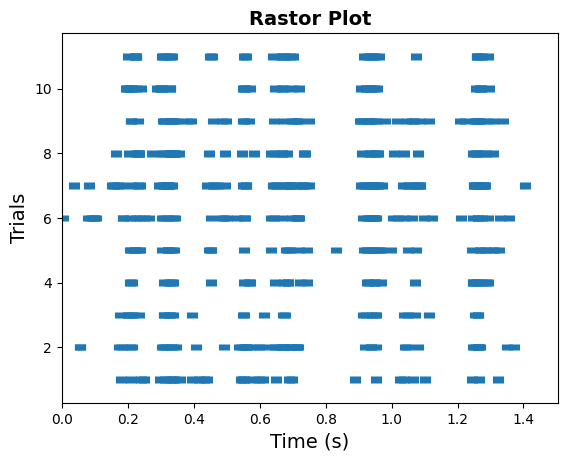

In [10]:
import matplotlib.pyplot as plt
spikes = {}
max_time = 0
sent=12
ch=3

trials = neural_data.get_trials(sent=12)
for i, tr in enumerate(trials):
    spikes[i] = neural_data.retrieve_spike_times(sent=12, trial=tr)[ch]
    mx = np.amax(spikes[i], axis=0)
    if mx > max_time:
        max_time = mx 
    #print(spikes[i].shape)
    plt.eventplot(spikes[i], lineoffsets=i+1, linelengths=0.2, linestyles='-', linewidths=8)
plt.xlim(0,max_time+0.1)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Trials', fontsize=14)
plt.title(f"Rastor Plot", fontsize=14, fontweight='bold')
plt.show()

Clips:  0.5 0.5
2.369625


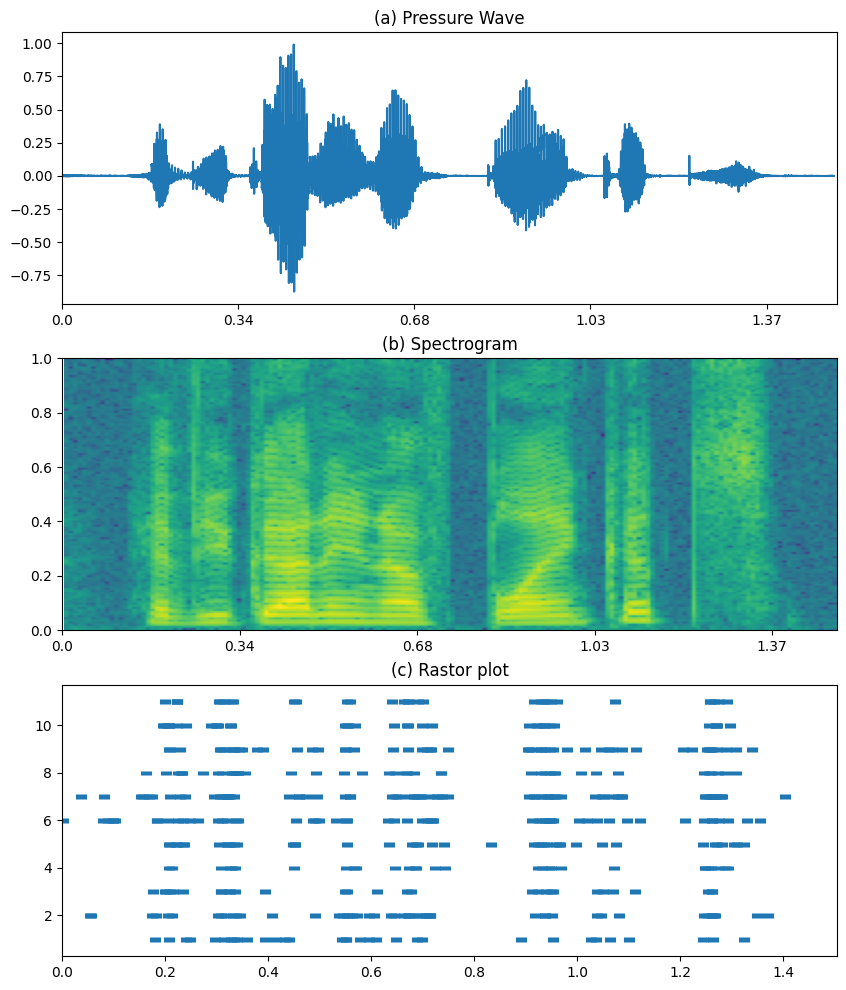

In [70]:

import matplotlib.pyplot as plt


sent_ID = 12
sent = sent_ID - 1 
sentdet = neural_data.sentdet

bef = sentdet[sent].befaft[0]
aft = sentdet[sent].befaft[1]
pw = sentdet[sent].sound
fs =  sentdet[sent].soundf

print("Clips: ", bef, aft)

pwDur = sentdet[sent].duration
print(pwDur)
spectroDur = sentdet[sent].aud.shape[1]
spectrogramPrecision = pwDur/spectroDur
befSpectro = round(bef/spectrogramPrecision)
aftSpectro = round(aft/spectrogramPrecision)

spectroTimeVec = np.linspace(0,pwDur-(bef+aft),5)
spectroTimeVec.round(decimals=2)
ticks = np.linspace(0, spectroDur-(befSpectro+aftSpectro), 5)

pwTimeVec = np.linspace(0,pwDur-(bef+aft), 5)

# neural_data.spectrogram(sent_ID)

fig, ax = plt.subplots(3,1, figsize=(10,12))
ax[0].plot(pw[int(bef*fs) : int(-aft*fs)])
# ax[0].set_xlim(0,1.5)
ax[1].specgram(pw[int(bef*fs) : int(-aft*fs)])
# ax[1].tight_layout()
# plt.xticks(ticks=np.linspace(0, spectroDur-(befSpectro+aftSpectro), 5) ,labels=spectroTimeVec.round(decimals=2))
# plt.xticks(ticks=np.linspace(0, (pwDur-(bef+aft))*fs, 5),labels=spectroTimeVec.round(decimals=2) )

plt.sca(ax[0])
plt.xticks(ticks=np.linspace(0,20000, 5),labels=spectroTimeVec.round(decimals=2))
ax[0].set_xlim(0, 22000)
ax[0].set_title("(a) Pressure Wave")

plt.sca(ax[1])
plt.xticks(ticks=np.linspace(0, 10000, 5),labels=spectroTimeVec.round(decimals=2))
ax[1].set_title("(b) Spectrogram")


trials = neural_data.get_trials(sent=12)
for i, tr in enumerate(trials):
    spikes[i] = neural_data.retrieve_spike_times(sent=12, trial=tr)[ch]
    mx = np.amax(spikes[i], axis=0)
    if mx > max_time:
        max_time = mx 
    #print(spikes[i].shape)
    ax[2].eventplot(spikes[i], lineoffsets=i+1, linelengths=0.2, linestyles='-', linewidths=8)

    ax[2].set_xlim(0,max_time+0.1)
# plt.xlabel('Time (s)', fontsize=14)
# plt.ylabel('Trials', fontsize=14)
# plt.title(f"Rastor Plot", fontsize=14, fontweight='bold')
# plt.show()
ax[2].set_title("(c) Rastor plot")

# plt.xticks(ticks=np.linspace(0, (pwDur-(bef+aft))*fs, 5),labels=spectroTimeVec.round(decimals=2) )
plt.show()

# plt.xticks(range(3), ['A', 'Big', 'Cat'], color='red')

# np.arange(0, spectroDur-(befSpectro+aftSpectro), 1)
# print(pwDur, spectroDur, befSpectro, aftSpectro)

